<a href="https://colab.research.google.com/github/Jananisp2005/Machine-learning-/blob/main/Car_Price_Perdiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Generate sample data
np.random.seed(42)  # For reproducibility
num_samples = 100

data = pd.DataFrame({
    'Year': np.random.randint(2010, 2023, size=num_samples),
    'Mileage': np.random.randint(10000, 150000, size=num_samples),
    'Engine': np.random.randint(1000, 3000, size=num_samples),
    'Brand': np.random.choice(['Toyota', 'Honda', 'Ford', 'Nissan'], size=num_samples),
    'Price': np.random.randint(5000, 50000, size=num_samples)
})

# Save the dataset to a CSV file
data.to_csv('car_data.csv', index=False)

print("Sample car dataset created and saved to 'car_data.csv'")

Sample car dataset created and saved to 'car_data.csv'


Model Performance:
Mean Absolute Error (MAE): 11064.15442705565
Mean Squared Error (MSE): 170953539.83281043
Root Mean Squared Error (RMSE): 13074.920261049794


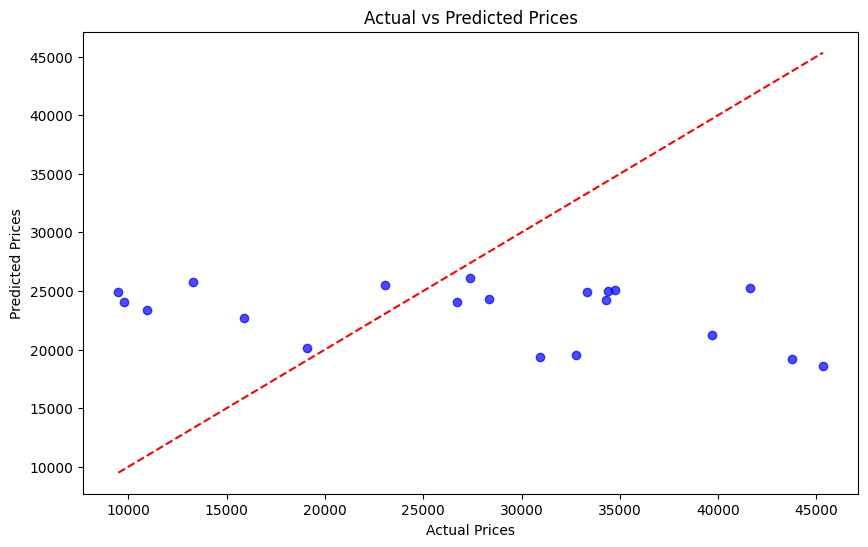

['car_price_prediction_model.pkl']

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('car_data.csv')

# Preprocessing
# Drop rows with missing values (not needed for this sample data)
# data.dropna(inplace=True)

# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['Brand'], drop_first=True)

# Define features (X) and target (y)
X = data.drop('Price', axis=1)
y = data['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Save the model (optional)
import joblib
joblib.dump(model, 'car_price_prediction_model.pkl')